## STUDENT PERFORMANCE ANALYSIS

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1. Problem Statement
+ This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

##### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of the dataset

In [4]:
df.shape

(1000, 8)

#### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the data set

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates values in the data set

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 69.17;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is higher = 10 and for reading we have = 17

#### 3.7 Exploring Data

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Normalizing Column Header**

In [11]:
df.columns = (
    df.columns.str.findall(r'\w+')
    .str.join('_')
    .str.lower()
)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable: ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable: ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df.loc[:,'total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**
+ From above values we get students have performed the worst in Maths
+ Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
+ Histogram
+ Kernel Distribution Estimation (KDE)
##### 4.1.1 Histogram & KDE

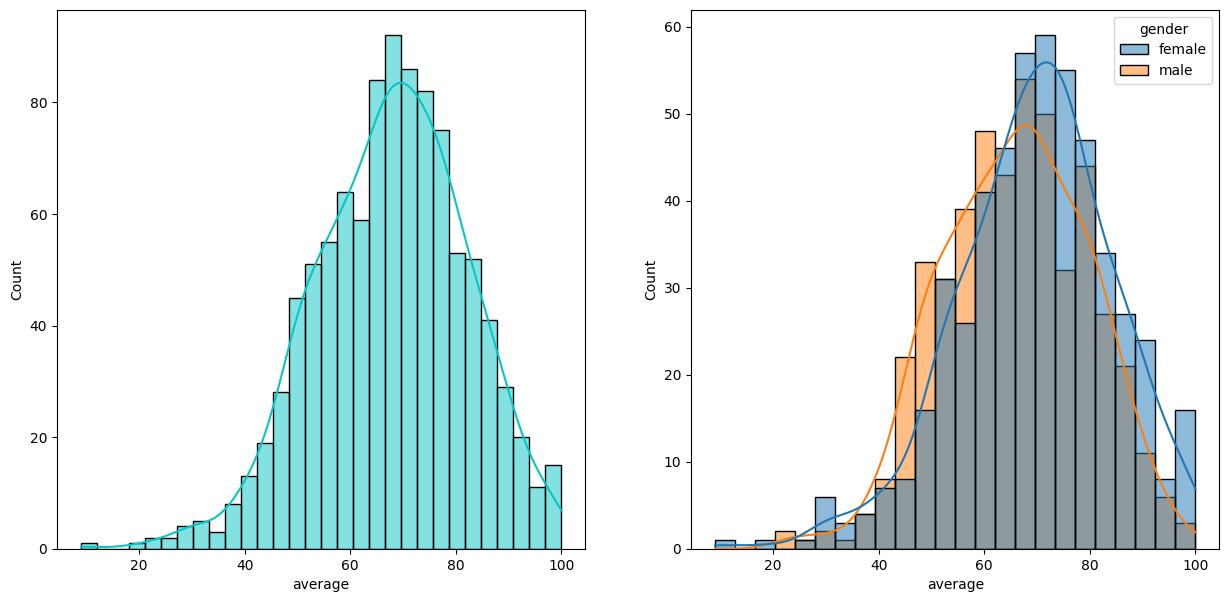

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color="#0AC5C5ED")
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

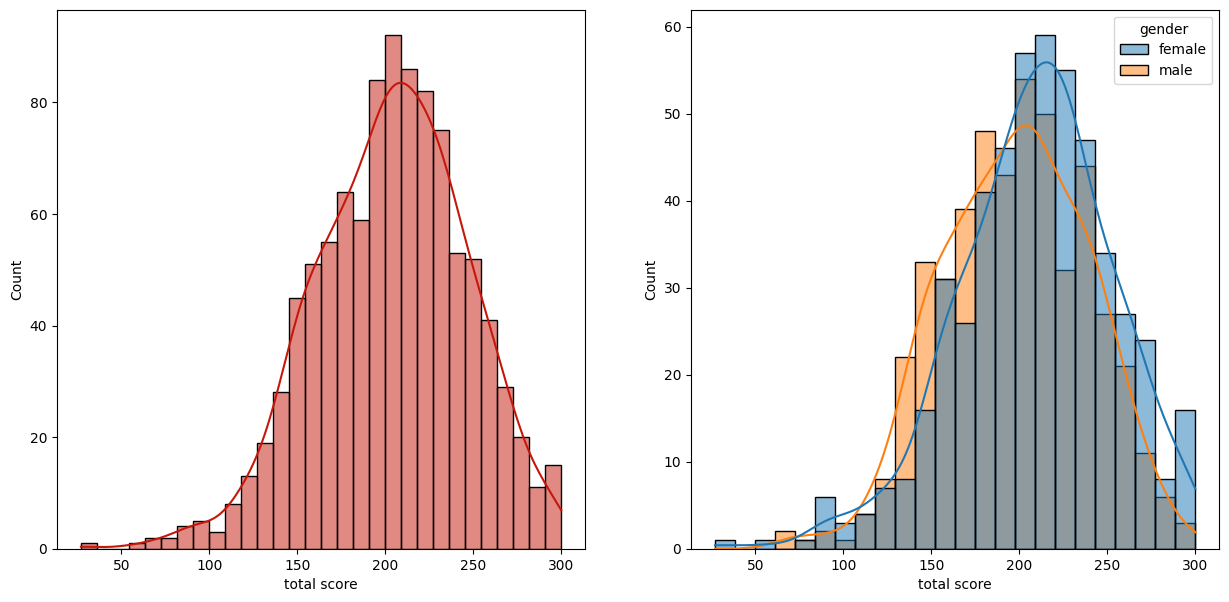

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color="#C5170AEC")
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

**Insights**
+ Female students tend to perform well then male students.

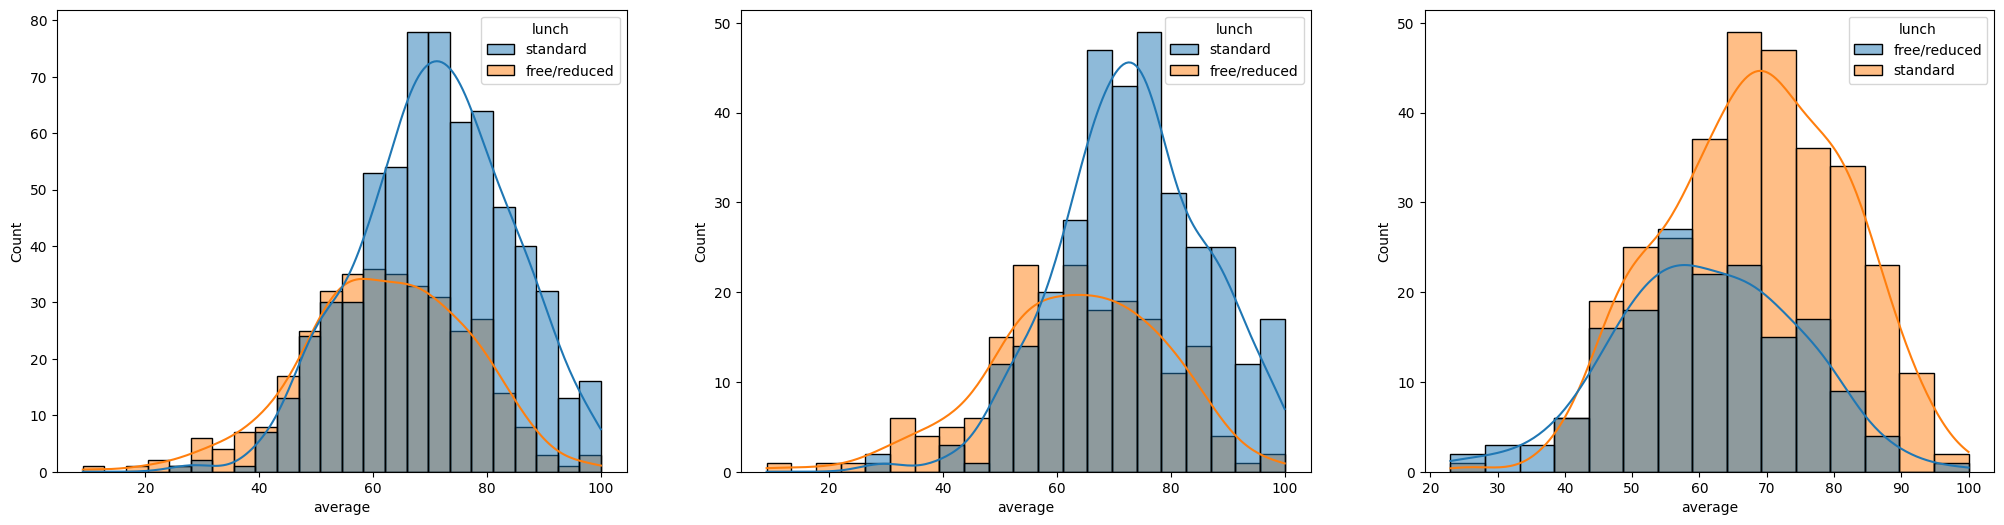

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

**Insights**
+ Standard lunch helps perform well in exams be it a male or a female.

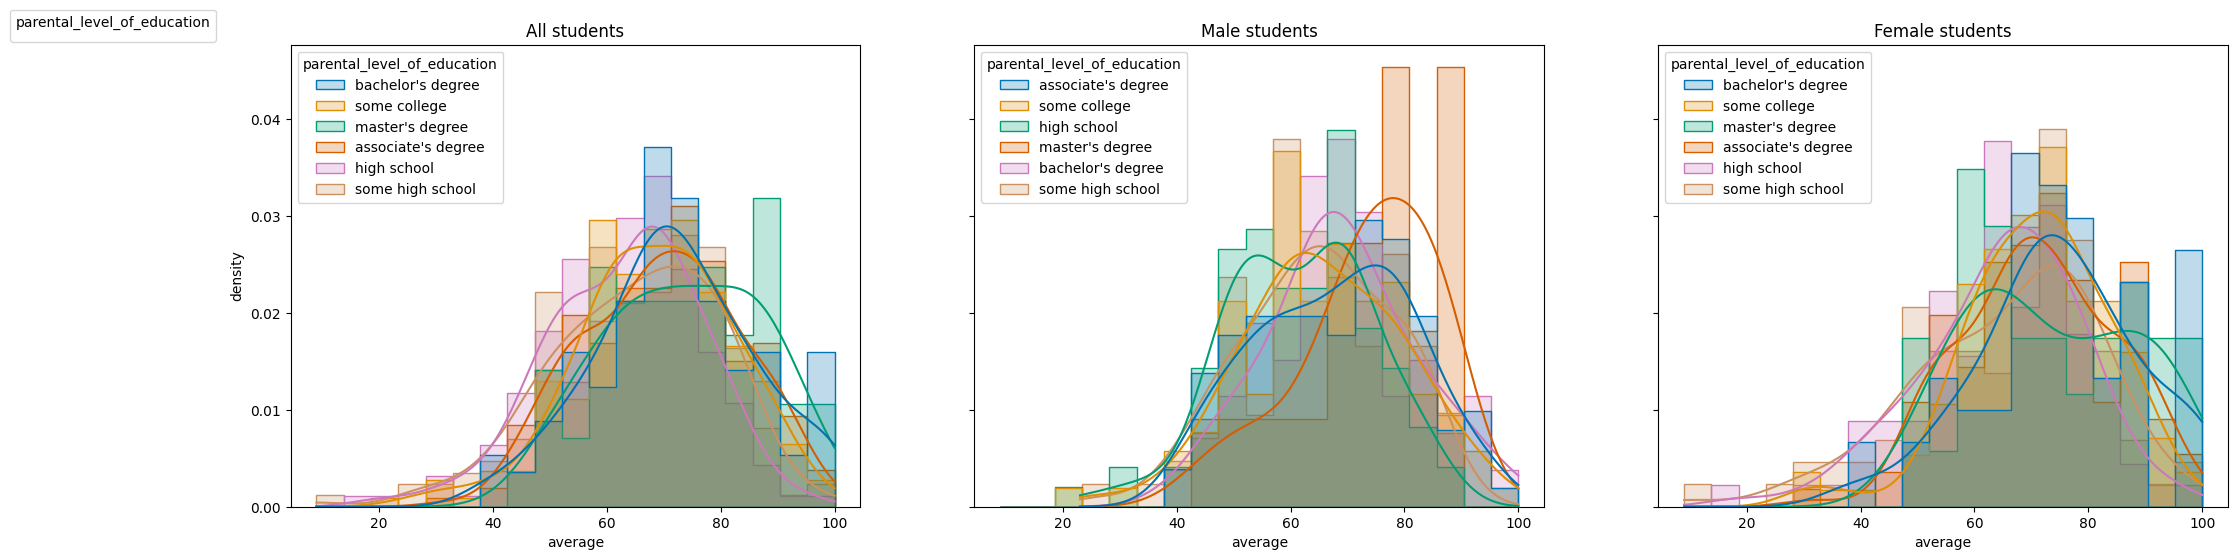

In [51]:
palette = sns.color_palette("colorblind")
bins = np.linspace(df['average'].min(), df['average'].max(), 20)  # consistent bins

fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharex=True, sharey=True)

# All students
sns.histplot(data=df, x='average', hue='parental_level_of_education',
             ax=axes[0],
             bins=bins,
             stat='density',        # compare shape, not raw counts
             element='step',        # outline-style hist (keeps overlap readable)
             common_norm=False,     # don't normalize across hues (each hue gets its own density)
             kde=True,
             palette=palette)
axes[0].set_title('All students')

# Males
sns.histplot(data=df[df.gender == 'male'], x='average', hue='parental_level_of_education',
             ax=axes[1],
             bins=bins,
             stat='density',
             element='step',
             common_norm=False,
             kde=True,
             palette=palette)
axes[1].set_title('Male students')

# Females
sns.histplot(data=df[df.gender == 'female'], x='average', hue='parental_level_of_education',
             ax=axes[2],
             bins=bins,
             stat='density',
             element='step',
             common_norm=False,
             kde=True,
             palette=palette)
axes[2].set_title('Female students')

# Tidy up legend & labels (single legend on the left)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='parental_level_of_education', loc='upper left', bbox_to_anchor=(0.01, 0.95))
for ax in axes:
    ax.set_xlabel('average')
    ax.set_ylabel('density')
plt.tight_layout(rect=[1.5, 0.1, .8, 0.95])
plt.show()


**Insights**
+ Parental education appears correlated with student average — higher parental education → higher average on average.
+ But overlap means other factors matter (test prep, ethnicity, etc.). Parental education is likely one predictor among several, not the sole cause.

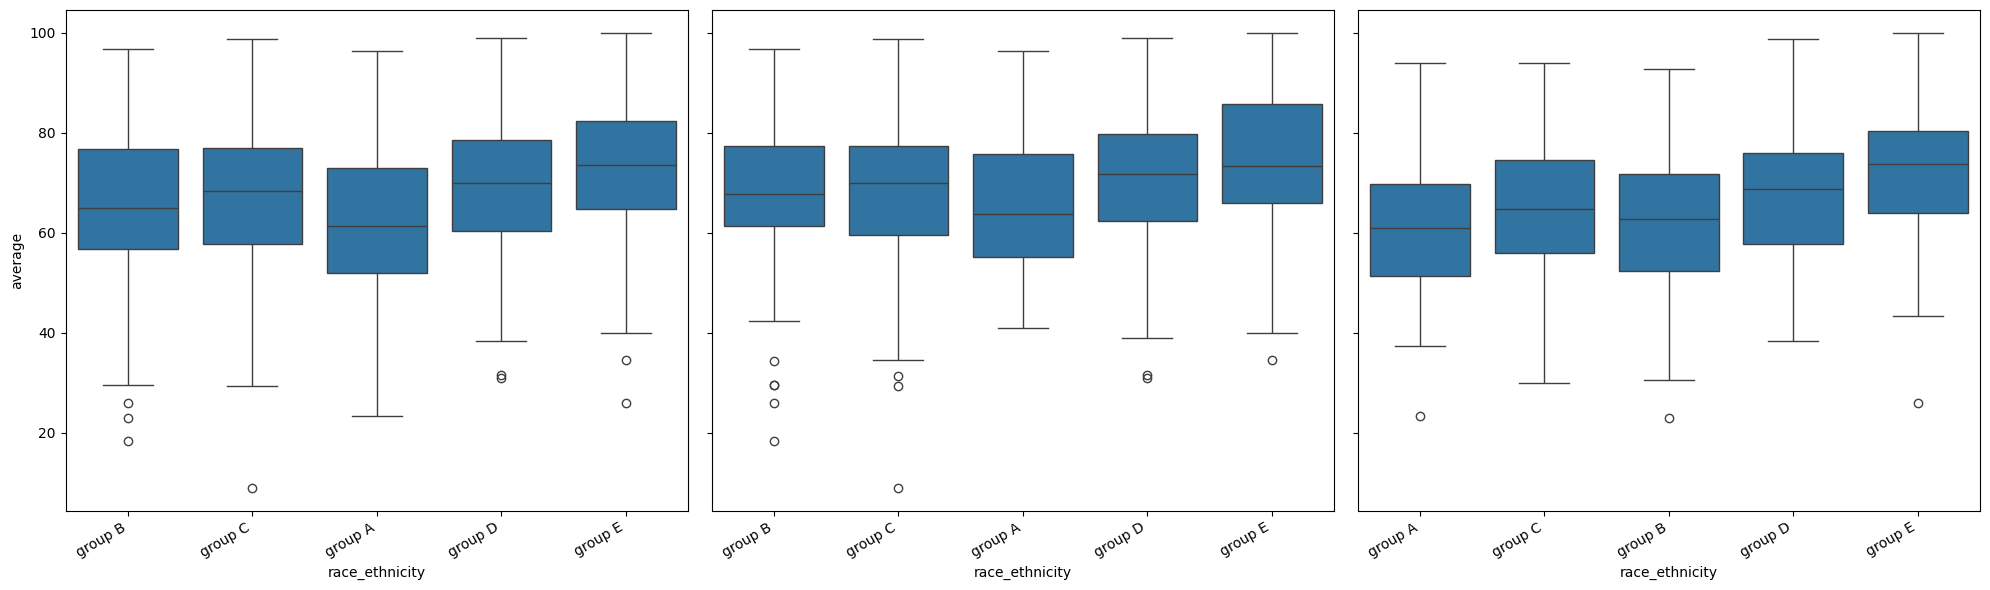

In [58]:
fig, axes = plt.subplots(1,3, figsize=(20,6), sharey=True)
sns.boxplot(data=df, x='race_ethnicity', y='average', ax=axes[0])
sns.boxplot(data=df[df.gender=='female'], x='race_ethnicity', y='average', ax=axes[1])
sns.boxplot(data=df[df.gender=='male'], x='race_ethnicity', y='average', ax=axes[2])
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Insight**
+Group E performs best on average and Group A worst, but distributions overlap and variance exists within every group.

#### 4.2 Maximumum score of students in all three subjects

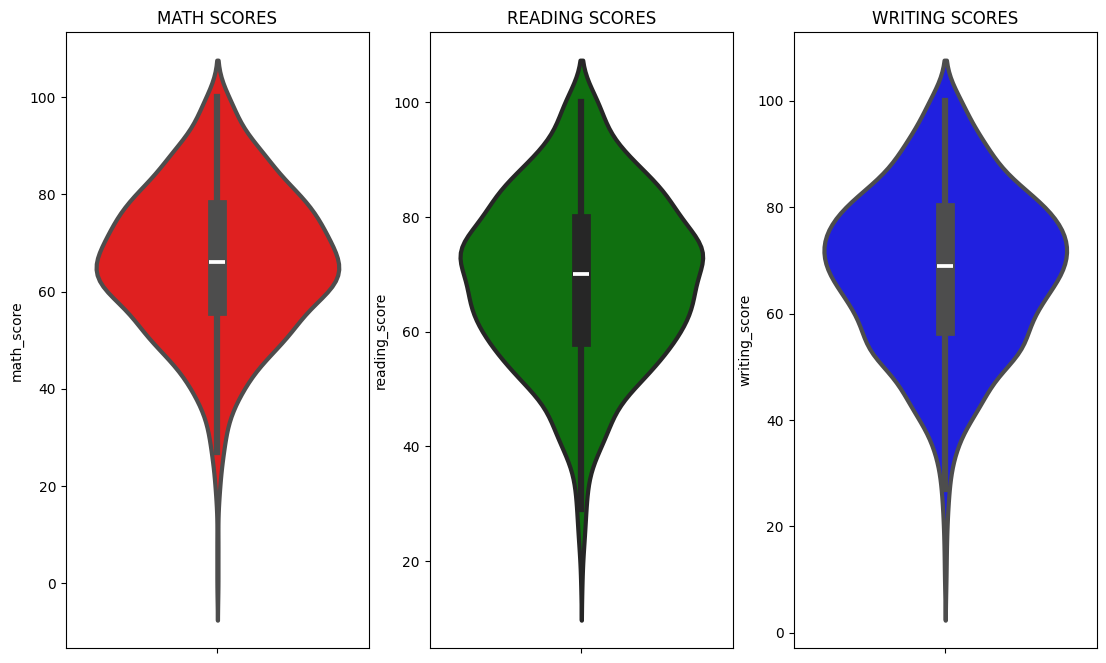

In [59]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
***Math scores*** show more variability — the distribution is broader, suggesting students are more spread out across the score range 60 -70.
***Reading and writing scores** are more concentrated — especially reading, which has a pronounced peak around the mid-70s to 80s.
***Median scores*** appear highest for reading, followed by writing, then math.
***Outliers:*** You can spot a few students scoring near 100 in all subjects, but they’re rare.

#### 4.3 Multivariate analysis using pieplot

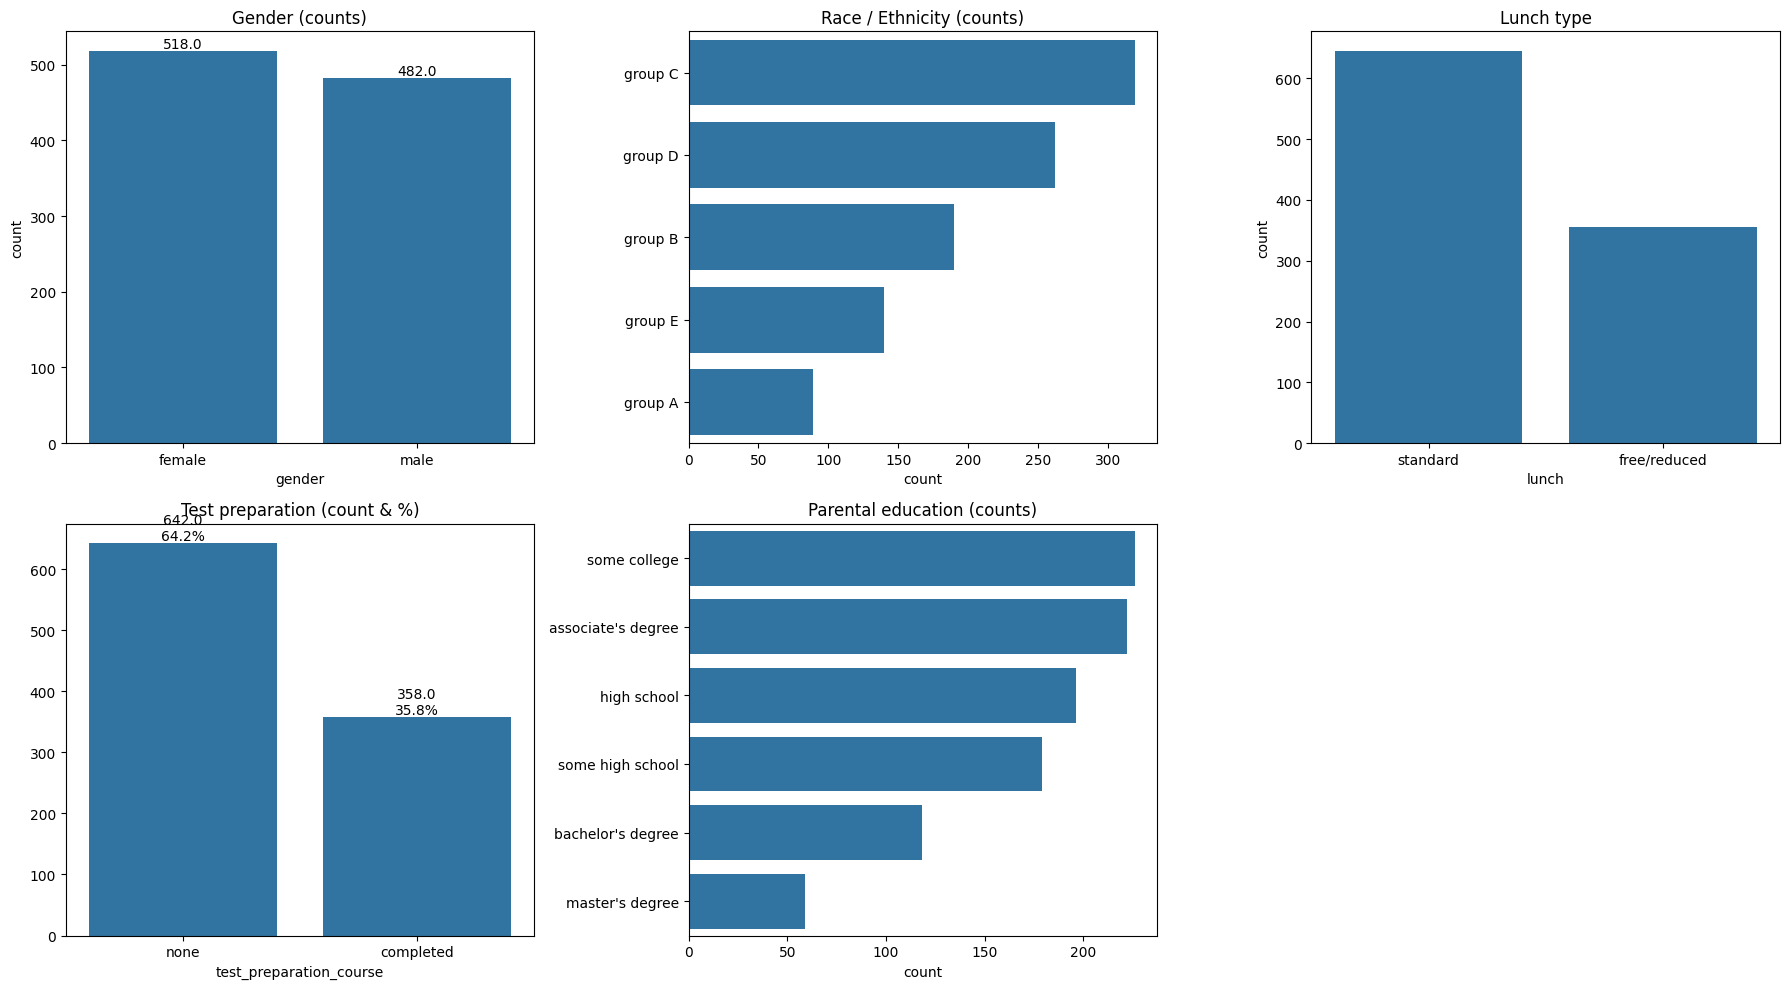

In [62]:
plt.figure(figsize=(18,10))

# 1) Gender (simple countbar)
plt.subplot(2,3,1)
order = df['gender'].value_counts().index
sns.countplot(data=df, x='gender', order=order)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x()+p.get_width()/2, height),
                       ha='center', va='bottom')
plt.title('Gender (counts)')

# 2) Race/Ethnicity (horizontal, sorted by count %)
plt.subplot(2,3,2)
race_order = df['race_ethnicity'].value_counts().index
sns.countplot(data=df, y='race_ethnicity', order=race_order)
plt.title('Race / Ethnicity (counts)')
plt.gca().set_ylabel('')

# 3) Lunch
plt.subplot(2,3,3)
sns.countplot(data=df, x='lunch')
plt.title('Lunch type')

# 4) Test prep (show %)
plt.subplot(2,3,4)
ax = sns.countplot(data=df, x='test_preparation_course')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    pct = height/total*100
    ax.annotate(f'{height}\n{pct:.1f}%', (p.get_x()+p.get_width()/2, height),
                ha='center', va='bottom')
plt.title('Test preparation (count & %)')
plt.gca().set_ylabel('')

# 5) Parental education (ordered)
plt.subplot(2,3,5)
edu_order = df['parental_level_of_education'].value_counts().index
sns.countplot(data=df, y='parental_level_of_education', order=edu_order)
plt.title('Parental education (counts)')
plt.gca().set_ylabel('')

plt.tight_layout()
plt.show()

**Insights**
+ Number of Male and Female students is almost equal
+ Number students are greatest in Group C
+ Number of students who have standard lunch are greater
+ Number of students who have not enrolled in any test preparation course is greater
+ Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"